# 参考情報
## 各種API
- https://oeconomicus.jp/2021/05/python-economicdata/#outline__2_1
## Alpha Vantage ページ
- https://rapidapi.com/alphavantage/api/alpha-vantage

# 使用するデータ取得ライブラリ
## pandas_datareader
- 主に株価の取得で用いる
## investpy
- 主に為替データの取得で用いる（https://qiita.com/matsxxx/items/f7c50b88f0b6d1c9e4d5）

In [9]:
import pandas_datareader.data as web # pandas-datareaderのインポート
import investpy
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
import seaborn as sns
import mplfinance as mpf
# import talib as ta
import warnings
from datetime import datetime, date, timedelta
from dateutil.relativedelta import relativedelta
warnings.simplefilter('ignore')
plt.rcParams["font.size"] = 12
plt.rcParams['figure.figsize'] = (32.0, 10.0)


##初期化
df_company=dict()

# 企業情報の取得
- PL
- 実績・予想EPS
- BS
- キャッシュフロー

- url_PL = 'https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol={}&apikey={}'.format(symbol,api_key)
- url_BS = 'https://www.alphavantage.co/query?function=BALANCE_SHEET&symbol={}&apikey={}'.format(symbol,api_key)
- url_CF = 'https://www.alphavantage.co/query?function=CASH_FLOW&symbol={}&apikey={}'.format(symbol,api_key)
- url_EPS = 'https://www.alphavantage.co/query?function=EARNINGS&symbol={}&apikey={}'.format(symbol,api_key)

In [10]:
api_key='SRG6H2AQ57H9PSQ4'

In [11]:
pl_japa=['収益','営業利益','EBITDA','純利益']
def getFr(symbol,api_key):
    url='https://www.alphavantage.co/query?function=INCOME_STATEMENT&symbol='+symbol+'&apikey='+api_key
    r = requests.get(url)
    r = r.json()
    data = r['quarterlyReports']
    df = pd.json_normalize(data)
    df.set_index('fiscalDateEnding',drop=True,inplace=True)
    df.index = pd.to_datetime(df.index)
    df = df.replace('None',0).drop('reportedCurrency',axis=1).astype(float).sort_index()
    df=df[['totalRevenue','operatingIncome','ebitda','netIncome']]
    df.columns=pl_japa
    return df

def getEps(symbol,api_key):
    url='https://www.alphavantage.co/query?function=EARNINGS&symbol='+symbol+'&apikey='+api_key
    r = requests.get(url)
    r = r.json()
    data = r['quarterlyEarnings']
    df_EPS = pd.json_normalize(data)
    df_EPS.set_index('fiscalDateEnding',drop=True,inplace=True)
    df_EPS.index = pd.to_datetime(df_EPS.index)
    df_EPS = df_EPS.replace('None',0)
    df_EPS[df_EPS.columns[1:]].astype(float).sort_index()
    df_EPS.columns=[['決算日','結果EPS','予想EPS','コンセンサス差','％']]
    return df_EPS

def getCf(symbol,api_key):
    url='https://www.alphavantage.co/query?function=CASH_FLOW&symbol='+symbol+'&apikey='+api_key
    r = requests.get(url)
    r = r.json()
    data = r['annualReports']
    df_CF = pd.json_normalize(data)
    df_CF.set_index('fiscalDateEnding',drop=True,inplace=True)
    df_CF.index = pd.to_datetime(df_CF.index)
    df_CF = df_CF.replace('None',0)
    df_CF[df_CF.columns[1:]].astype(float).sort_index()
#     df_CF.columns=[['決算日','結果EPS','予想EPS','コンセンサス差','％']]
    return df_CF

def BS(symbol,api_key):
    url='https://www.alphavantage.co/query?function=BALANCE_SHEET&symbol='+symbol+'&apikey='+api_key
    r = requests.get(url)
    r = r.json()
    data = r['annualReports']
    df_BS = pd.json_normalize(data)
    df_BS.set_index('fiscalDateEnding',drop=True,inplace=True)
    df_BS.index = pd.to_datetime(df_BS.index)
    df_BS = df_BS.replace('None',0)
    df_BS[df_BS.columns[1:]].astype(float).sort_index()
#     df_BS.columns=[['決算日','結果EPS','予想EPS','コンセンサス差','％']]
    return df_BS

def FR_EPS(company_list):
    for company in company_list:
        df_FR=getFr(company,api_key)
        index_min=df_FR.index[0]
        df_EPS=getEps(company,api_key)
        df_EPS=df_EPS.loc[df_EPS.index>=index_min]
        df_company[company]=pd.concat([df_FR,df_EPS[::-1]], axis=1)
    return df_company

In [12]:
fr_aapl=getFr('AAPL',api_key)
fr_aapl

,収益,営業利益,EBITDA,純利益
fiscalDateEnding,,,,
2018-06-30,5.326500e+10,1.261200e+10,1.527700e+10,1.151900e+10
2018-09-30,6.290000e+10,1.611800e+10,1.887200e+10,1.412500e+10
2018-12-31,8.342000e+10,2.334600e+10,2.674100e+10,1.996500e+10
2019-03-31,5.700500e+10,1.341500e+10,1.645500e+10,1.156100e+10
2019-06-30,5.294300e+10,1.154400e+10,1.447700e+10,1.004400e+10
2019-09-30,6.404000e+10,1.562500e+10,1.880400e+10,1.368600e+10
2019-12-31,9.103400e+10,2.556900e+10,2.838500e+10,2.223600e+10
2020-03-31,5.755600e+10,1.285300e+10,1.563900e+10,1.124900e+10
2020-06-30,5.898800e+10,1.309100e+10,1.584300e+10,1.125300e+10


In [17]:
company_list=['PLTR','MSFT']

df_company=FR_EPS(company_list)
df_company['MSFT']

,収益,営業利益,EBITDA,純利益,"(決算日,)","(結果EPS,)","(予想EPS,)","(コンセンサス差,)","(％,)"
fiscalDateEnding,,,,,,,,,
2018-06-30,3.008500e+10,1.037900e+10,1.185200e+10,8.873000e+09,2018-07-19,1.13,1.08,0.05,4.6296
2018-09-30,2.861500e+10,9.955000e+09,1.145100e+10,8.824000e+09,2018-10-24,1.14,0.96,0.18,18.75
2018-12-31,3.179600e+10,1.025800e+10,1.158700e+10,8.420000e+09,2019-01-30,1.1,1.09,0.01,0.9174
2019-03-31,2.999300e+10,1.034100e+10,1.158800e+10,8.809000e+09,2019-04-24,1.14,1,0.14,14
2019-06-30,3.371700e+10,1.240500e+10,1.366500e+10,1.318700e+10,2019-07-18,1.37,1.21,0.16,13.2231
2019-09-30,3.242800e+10,1.268600e+10,1.388200e+10,1.067800e+10,2019-10-23,1.38,1.25,0.13,10.4
2019-12-31,3.632200e+10,1.389100e+10,1.531300e+10,1.164900e+10,2020-01-29,1.51,1.32,0.19,14.3939
2020-03-31,3.431500e+10,1.297500e+10,1.394800e+10,1.075200e+10,2020-04-29,1.4,1.26,0.14,11.1111
2020-06-30,3.803300e+10,1.340700e+10,1.469600e+10,1.120200e+10,2020-07-22,1.46,1.34,0.12,8.9552


In [13]:
test2=getEps('AAPL',api_key)
test2.loc[test2.index>='2016-12-31']

,決算日,結果EPS,予想EPS,コンセンサス差,％
fiscalDateEnding,,,,,
2023-03-31,2023-05-04,1.52,1.43,0.09,6.2937
2022-12-31,2023-02-02,1.88,1.94,-0.06,-3.0928
2022-09-30,2022-10-27,1.29,1.27,0.02,1.5748
2022-06-30,2022-07-28,1.2,1.16,0.04,3.4483
2022-03-31,2022-04-28,1.52,1.43,0.09,6.2937
2021-12-31,2022-01-27,2.1,1.89,0.21,11.1111
2021-09-30,2021-10-28,1.24,1.24,0,0
2021-06-30,2021-07-27,1.3,1.01,0.29,28.7129
2021-03-31,2021-04-28,1.4,0.99,0.41,41.4141


In [14]:
test3=getCf('AAPL',api_key)
test3

,reportedCurrency,operatingCashflow,paymentsForOperatingActivities,proceedsFromOperatingActivities,changeInOperatingLiabilities,changeInOperatingAssets,depreciationDepletionAndAmortization,capitalExpenditures,changeInReceivables,changeInInventory,...,dividendPayoutCommonStock,dividendPayoutPreferredStock,proceedsFromIssuanceOfCommonStock,proceedsFromIssuanceOfLongTermDebtAndCapitalSecuritiesNet,proceedsFromIssuanceOfPreferredStock,proceedsFromRepurchaseOfEquity,proceedsFromSaleOfTreasuryStock,changeInCashAndCashEquivalents,changeInExchangeRate,netIncome
fiscalDateEnding,,,,,,,,,,,,,,,,,,,,,
2022-09-30,USD,122151000000,4665000000,0,15558000000,14358000000,11104000000,10708000000,9343000000,-1484000000,...,14841000000,0,0,5465000000,0,-89402000000,0,-10952000000,0,99803000000
2021-09-30,USD,104038000000,4087000000,0,19801000000,24712000000,11284000000,11085000000,14028000000,2642000000,...,14467000000,0,1105000000,20393000000,0,-84866000000,0,-3860000000,0,94680000000
2020-09-30,USD,80674000000,4502000000,0,6935000000,1245000000,11056000000,7309000000,-8470000000,127000000,...,14081000000,0,880000000,16091000000,0,-71478000000,0,-10435000000,0,57411000000
2019-09-30,USD,69391000000,3423000000,0,-7248000000,-3760000000,12547000000,10495000000,-3176000000,289000000,...,14119000000,0,781000000,6963000000,0,-66116000000,0,24311000000,0,55256000000
2018-09-30,USD,77434000000,3022000000,0,47665000000,12927000000,10903000000,13313000000,13332000000,-828000000,...,13712000000,0,669000000,6969000000,0,-72069000000,0,5624000000,0,59531000000


In [15]:
test4=BS('AAPL',api_key)
test4

,reportedCurrency,totalAssets,totalCurrentAssets,cashAndCashEquivalentsAtCarryingValue,cashAndShortTermInvestments,inventory,currentNetReceivables,totalNonCurrentAssets,propertyPlantEquipment,accumulatedDepreciationAmortizationPPE,...,currentLongTermDebt,longTermDebtNoncurrent,shortLongTermDebtTotal,otherCurrentLiabilities,otherNonCurrentLiabilities,totalShareholderEquity,treasuryStock,retainedEarnings,commonStock,commonStockSharesOutstanding
fiscalDateEnding,,,,,,,,,,,,,,,,,,,,,
2022-09-30,USD,352755000000,135405000000,23646000000,48304000000,4946000000,60932000000,217350000000,42117000000,72340000000,...,11128000000,98959000000,233256000000,60845000000,49142000000,50672000000,0,-3068000000,64849000000,15943425000
2021-09-30,USD,351002000000,134836000000,34940000000,62639000000,6580000000,51506000000,216166000000,39440000000,70283000000,...,9613000000,109106000000,241783000000,47493000000,53325000000,63090000000,0,5562000000,57365000000,16426786000
2020-09-30,USD,323888000000,143713000000,38016000000,90943000000,4061000000,37445000000,180175000000,36766000000,66760000000,...,8773000000,98667000000,216860000000,42684000000,54490000000,65339000000,0,14966000000,50779000000,16976763000
2019-09-30,USD,338516000000,162819000000,48844000000,100557000000,4106000000,45804000000,175697000000,37378000000,58579000000,...,10260000000,91807000000,209135000000,37720000000,50503000000,90488000000,0,45898000000,45174000000,4443236000
2018-09-30,USD,365725000000,131339000000,25913000000,25913000000,3956000000,48995000000,234386000000,41304000000,49099000000,...,8784000000,93735000000,220132000000,33327000000,48914000000,107147000000,0,70400000000,40201000000,4754986000


# 統計・株価データの取得

In [16]:
##P500、AAPL、米国10年債利回り
df = web.DataReader(['^SPX','AAPL','10USY.B'],'stooq',start='2018-01-01')
df['Close']

Symbols,^SPX,AAPL,10USY.B
Date,,,
2018-01-02,2695.81,40.9501,2.4633
2018-01-03,2713.06,40.9431,2.4490
2018-01-04,2723.99,41.1366,2.4562
2018-01-05,2743.15,41.6001,2.4799
2018-01-08,2747.71,41.4575,2.4800
...,...,...,...
2023-05-03,4090.75,167.4500,3.3640
2023-05-04,4061.22,165.7900,3.3770
2023-05-05,4136.25,173.5700,3.4410


# テクニカル指標ライブラリ

## ボリンジャーバンド
- ta.BBANDS(終値)
- timeperiod：移動平均期間
- nbdevup：ボリンジャーバンドの上σ
- nbdevdn：ボリンジャーバンドの下σ
- matype：移動平均の計算手法
    - 0：単純移動平均
    - 1：指数移動平均
    - 2：加重移動平均
    
## MACD
- ta.MACD(終値)
- fastperiod：短期移動平均
- slowperiod：長期移動平均
- signalperiod：MACDシグナル
    - MACDの移動平均

## RSI
- ta.RSI(終値)
- timeperiod：RSIを作成する期間

In [40]:
##ボリンジャーバンド、MACD、RSIの取得及び可視化
##引数：データフレーム、ボリンジャーバンドσ、グラフ表示の有無
##investpyによる為替データ取得ではグラフ化は不可能だった

def technicalCalc1(df,bb_sigma, graph):
    #ボリンジャーバンド
    df['upper'], df['middle'], df['lower']=ta.BBANDS(df['Close'], timeperiod=25, nbdevup=bb_sigma, nbdevdn=bb_sigma, matype=0)

    #グラフ用のボリンジャーバンド項目を追加
    # apds = [mpf.make_addplot(df['upper'], color='g'),
    #        mpf.make_addplot(df['middle'], color='b'),
    #        mpf.make_addplot(df['lower'], color='r')
    #        ]



    #MACD
    df['macd'], df['macdsignal'], df['macdhist'] = ta.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)

    #グラフ用のボリンジャーバンド、MACD項目を追加
    # apds = [mpf.make_addplot(df['upper'], color='g'),
    #        mpf.make_addplot(df['middle'], color='b'),
    #        mpf.make_addplot(df['lower'], color='r'),
    #        mpf.make_addplot(df['macdhist'], type='bar', color='gray', width=1.0, panel=1, alpha=0.5, ylabel='MACD')
    #        ]




    #RSI
    df['RSI']=ta.RSI(df['Close'], timeperiod=25)


    #グラフ用のボリンジャーバンド、MACD、RSI項目を追加
    apds = [mpf.make_addplot(df['upper'], color='g'),
           mpf.make_addplot(df['middle'], color='b'),
           mpf.make_addplot(df['lower'], color='r'),
           mpf.make_addplot(df['macd'], color='red', panel=1),
           mpf.make_addplot(df['macdsignal'], color='blue', panel=1),
           mpf.make_addplot(df['RSI'], panel=2, type='line', ylabel='RSI')
           ]

    ##株価をグラフ化
    if graph:
        mpf.plot(df, type='candle', figsize=(30,15), style='yahoo', volume=True, addplot=apds, volume_panel=3, panel_ratios=(5,2,2,1))
    
    return df

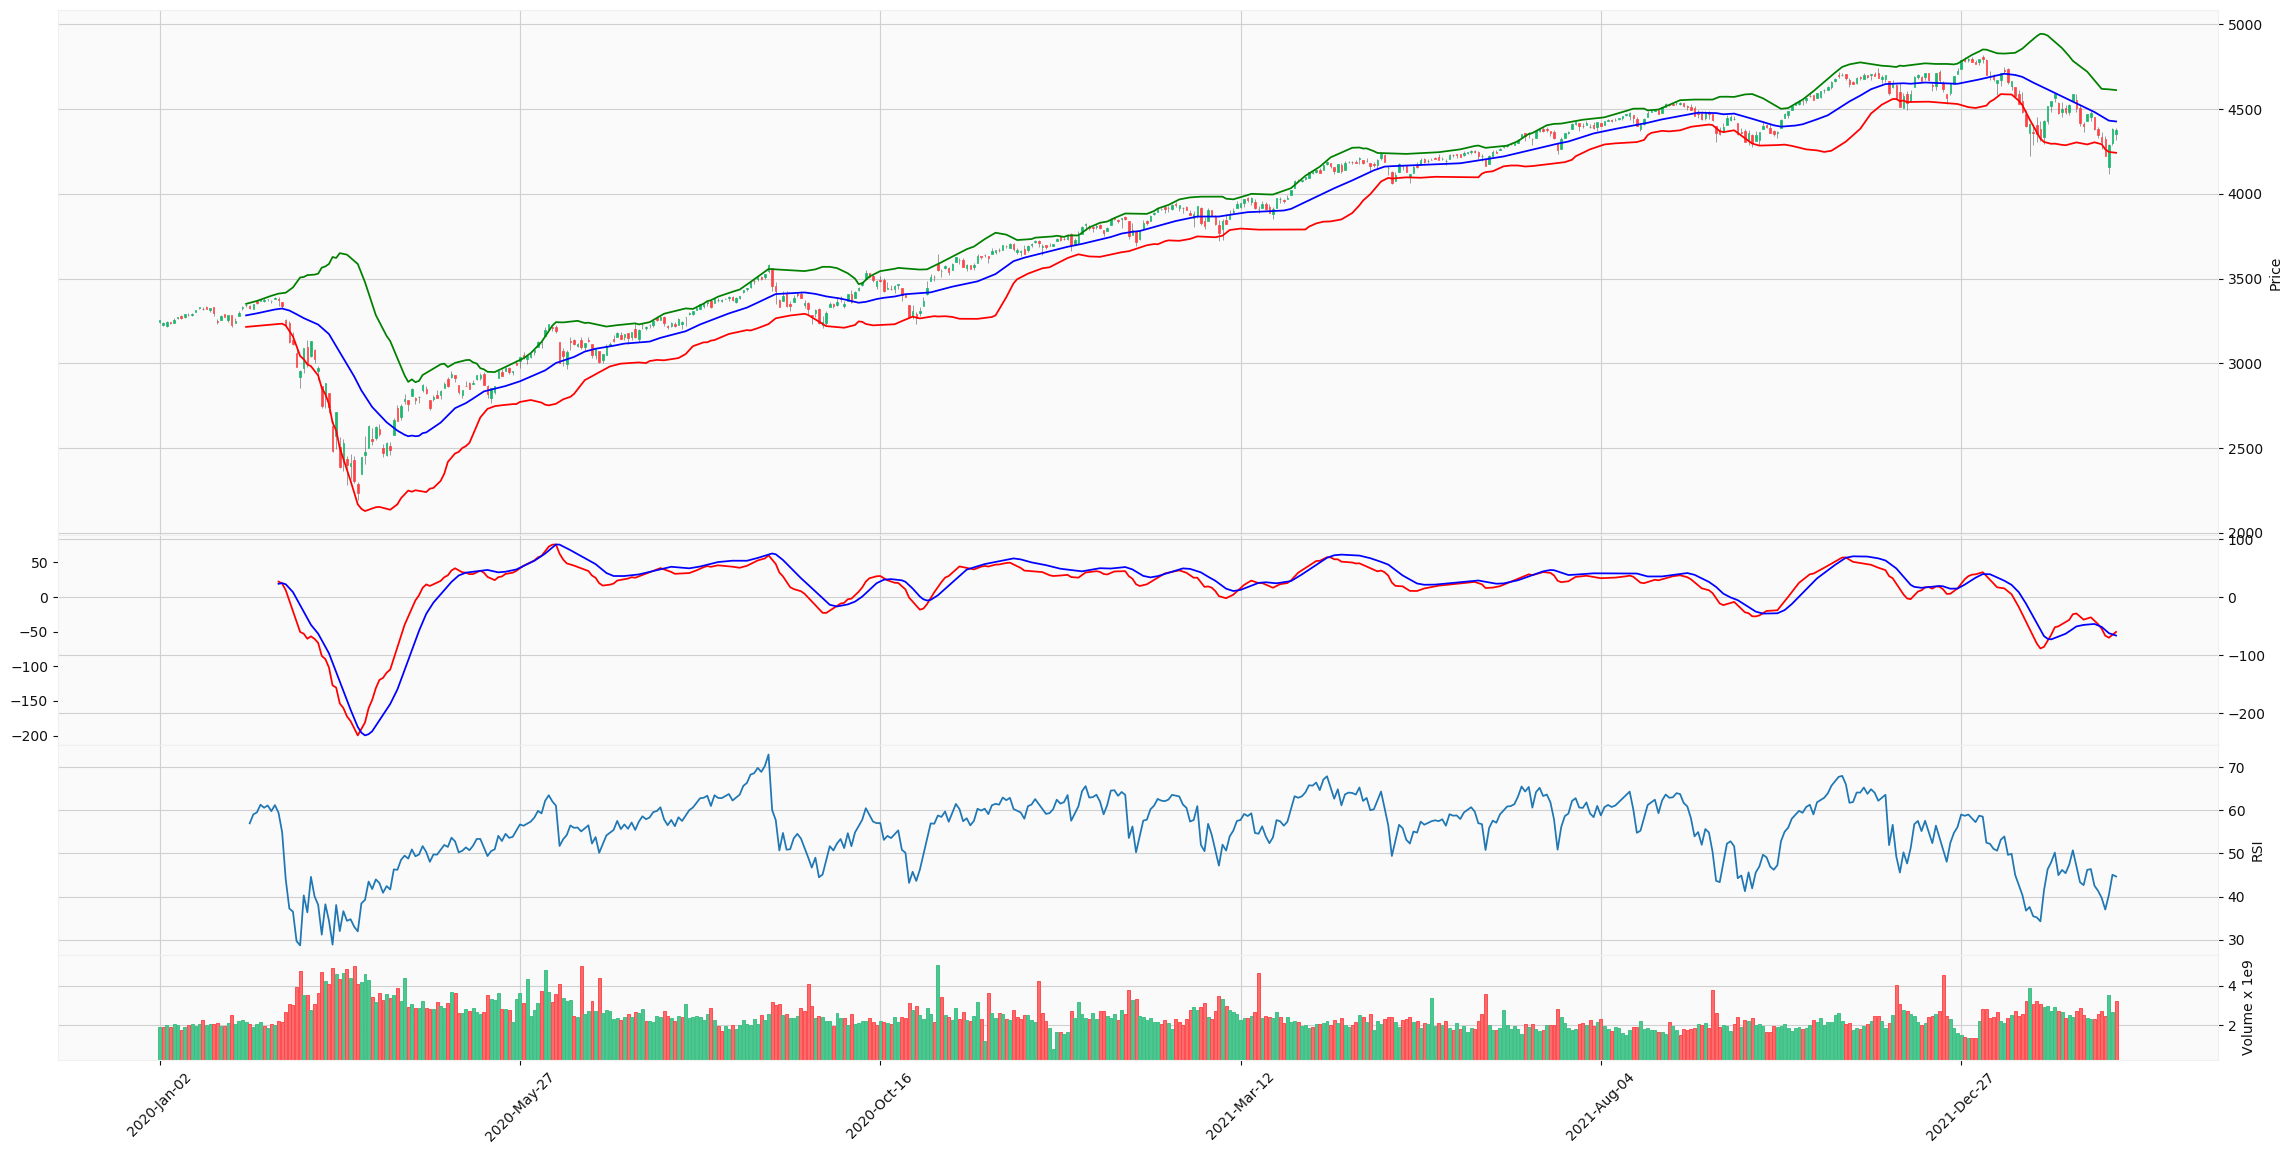

In [36]:
##SP500指数取得

stock_sp500 = web.DataReader('^SPX','stooq',start='2020-01-01')
df=stock_sp500[::-1]
# df
df1=technicalCalc1(df,2,True)
df1
df2=df1


In [41]:
##為替データの取得
##日付指定が欧米式
ticker='USD/JPY'
usd_jpy = investpy.get_currency_cross_historical_data(currency_cross=ticker, from_date='01/02/2010', to_date='28/03/2021')
df1=usd_jpy
df1=technicalCalc1(df1,2,False)
df1

,Open,High,Low,Close,Currency,upper,middle,lower,macd,macdsignal,macdhist,RSI
Date,,,,,,,,,,,,
2010-02-01,90.25,90.94,90.00,90.76,JPY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-02,90.77,90.91,90.26,90.45,JPY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-03,90.45,91.28,90.08,90.89,JPY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-04,90.89,91.08,88.55,89.38,JPY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-05,89.38,89.89,88.83,89.22,JPY,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-22,108.86,108.96,108.51,108.83,JPY,110.240973,107.4140,104.587027,0.940961,0.966780,-0.025819,68.893564
2021-03-23,108.85,108.89,108.40,108.56,JPY,110.318227,107.5148,104.711373,0.876503,0.948725,-0.072221,65.960211
2021-03-24,108.59,108.96,108.44,108.72,JPY,110.385582,107.6296,104.873618,0.828777,0.924735,-0.095958,66.831958


In [42]:
# # ボリンジャーバンドに対してのラベル   bb_result
# #  0：特になし　　1：upper以上　　3：lower以下

# df1['bb_result']='0'
# df1['bb_result'].loc[df1['Close']>=df1['upper']]='1'
# df1['bb_result'].loc[df1['Close']<=df1['lower']]='3'

# # MACDに対してのラベル
# #  macd < macdsignal ：1　　　macd >= macdsignal　：0

# df1['macd_kari']='0'
# df1['macd_kari'].loc[df1['macd'] < df1['macdsignal']]='1'

# # MACD クロスポイント
# # ゴールデンクロス：1　　デッドクロス：2　　何もなし：0
# df1['macd_cross']='0'
# for i in range(len(df1)-1):
#     if pd.notna(df1['macd'][i]):
        
#         if df1['macd_kari'][i+1] == '0':
#             if df1['macd_kari'][i] == '1':
#                 df1['macd_cross'][i+1] = '2'
                
#         elif df1['macd_kari'][i+1] == '1':
#             if df1['macd_kari'][i] == '0':
#                 df1['macd_cross'][i+1] = '1'


# # RSI
# #  70%以上：1　　　30％以下：2

# df1['rsi_result']='0'
# df1['rsi_result'].loc[df1['RSI']>=70]='1'
# df1['rsi_result'].loc[df1['RSI']<=30]='2'

                
        
    
df1


,Open,High,Low,Close,Currency,upper,middle,lower,macd,macdsignal,macdhist,RSI,bb_result,macd_kari,macd_cross,rsi_result
Date,,,,,,,,,,,,,,,,
2010-02-01,90.25,90.94,90.00,90.76,JPY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
2010-02-02,90.77,90.91,90.26,90.45,JPY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
2010-02-03,90.45,91.28,90.08,90.89,JPY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
2010-02-04,90.89,91.08,88.55,89.38,JPY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
2010-02-05,89.38,89.89,88.83,89.22,JPY,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-22,108.86,108.96,108.51,108.83,JPY,110.240973,107.4140,104.587027,0.940961,0.966780,-0.025819,68.893564,0,1,1,0
2021-03-23,108.85,108.89,108.40,108.56,JPY,110.318227,107.5148,104.711373,0.876503,0.948725,-0.072221,65.960211,0,1,0,0
2021-03-24,108.59,108.96,108.44,108.72,JPY,110.385582,107.6296,104.873618,0.828777,0.924735,-0.095958,66.831958,0,1,0,0


In [43]:
# ボリンジャーバンド超過時の20営業日後の株価変化率

def bb_result_move_rate(df1,date):
    upper_one_month_list=[]
    lower_one_month_list=[]
    upper_one_month_date_list=[]
    lower_one_month_date_list=[]

    for i in range(len(df1)-date):

        if df1['bb_result'][i] == '1':
            calc1 = round((df1['Close'][i+date] - df1['Close'][i]) / df1['Close'][i] * 100, 2)
            upper_one_month_list.append(calc1)
            upper_one_month_date_list.append(df1.index[i])


        if df1['bb_result'][i] == '3':
            calc2 = round((df1['Close'][i+date] - df1['Close'][i]) / df1['Close'][i] * 100, 2)
            lower_one_month_list.append(calc2)
            lower_one_month_date_list.append(df1.index[i])

    upper_one_month_df=pd.DataFrame(upper_one_month_list, upper_one_month_date_list, columns=['bb_upper_move'+str(date)])
    lower_one_month_df=pd.DataFrame(lower_one_month_list, lower_one_month_date_list, columns=['bb_lower_move'+str(date)])

    df1=pd.concat([df1,upper_one_month_df,lower_one_month_df], axis=1)
    return df1

,Open,High,Low,Close,Currency,upper,middle,lower,macd,macdsignal,...,bb_result,macd_kari,macd_cross,rsi_result,bb_upper_move5,bb_lower_move5,bb_upper_move20,bb_lower_move20,bb_upper_move70,bb_lower_move70
2010-02-01,90.25,90.94,90.00,90.76,JPY,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-02,90.77,90.91,90.26,90.45,JPY,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-03,90.45,91.28,90.08,90.89,JPY,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-04,90.89,91.08,88.55,89.38,JPY,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-05,89.38,89.89,88.83,89.22,JPY,NaN,NaN,NaN,NaN,NaN,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-22,108.86,108.96,108.51,108.83,JPY,110.240973,107.4140,104.587027,0.940961,0.966780,...,0,1,1,0,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-23,108.85,108.89,108.40,108.56,JPY,110.318227,107.5148,104.711373,0.876503,0.948725,...,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-24,108.59,108.96,108.44,108.72,JPY,110.385582,107.6296,104.873618,0.828777,0.924735,...,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-25,108.74,109.24,108.71,109.17,JPY,110.467323,107.7700,105.072677,0.817837,0.903355,...,0,1,0,0,NaN,NaN,NaN,NaN,NaN,NaN


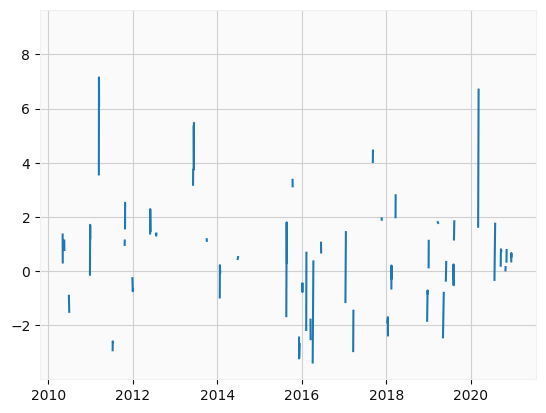

In [44]:
##ボリンジャーバンドの株価変化率を各期間で比較

# bb_range_list=[5,20,70]
# for i in bb_range_list:
#     df1=bb_result_move_rate(df1,i)
# df_bb_move=df1.iloc[:,18:]
# plt.plot(df_bb_move['bb_lower_move20'])
df1

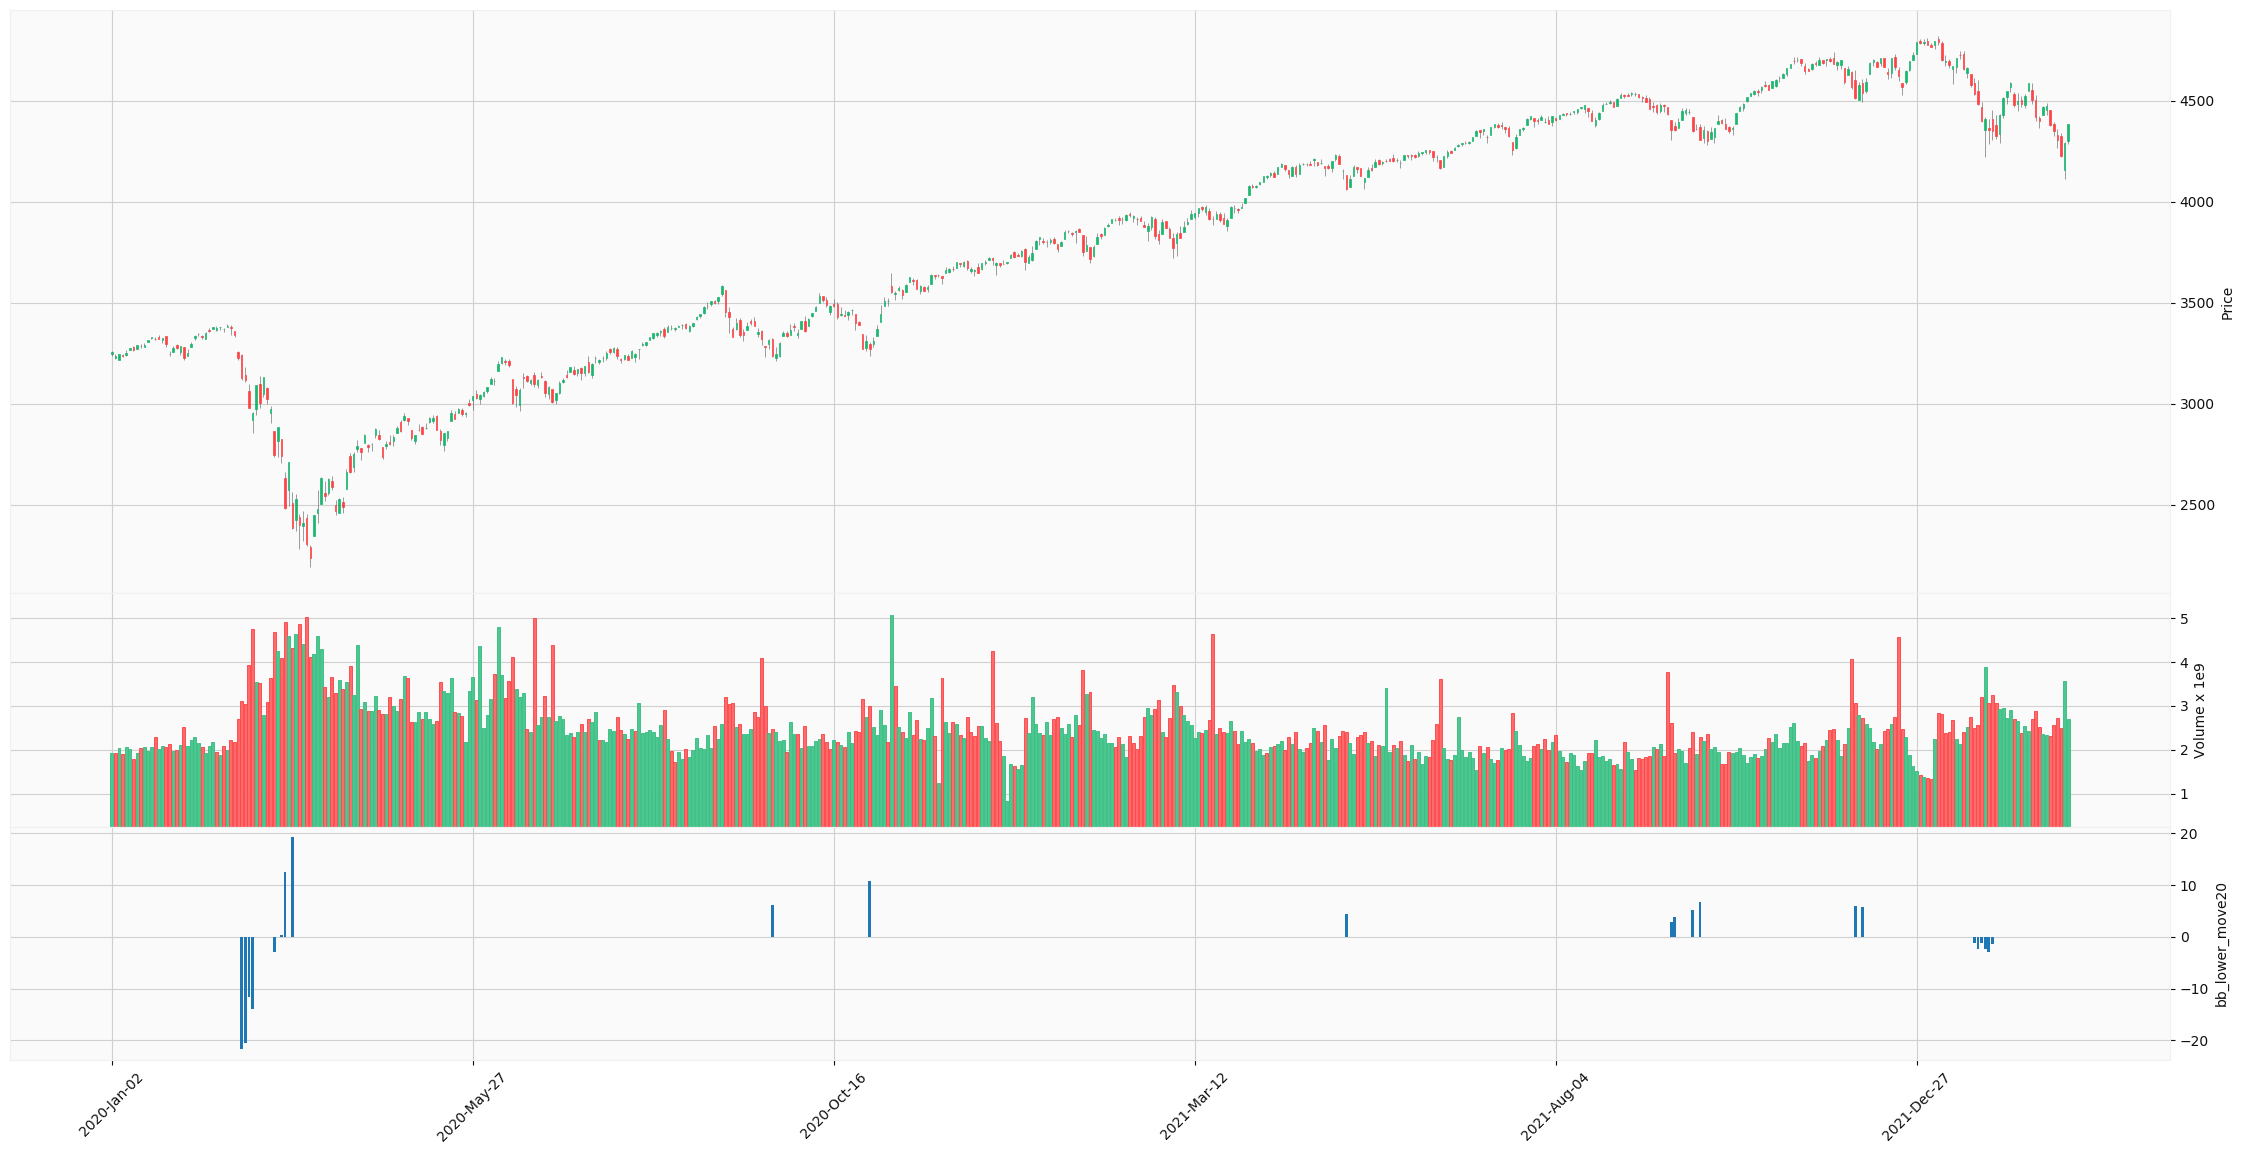

In [155]:
# ボリンジャーバンドの株価変化率を含めたグラフ例

# df1.loc[df1['bb_upper_one_month_move'].notna()]
# df1.loc[df1['bb_lower_one_month_move'].notna()]

apds = [mpf.make_addplot(df1['bb_lower_move20'], panel=2, type='bar', ylabel='bb_lower_move20')]

mpf.plot(df1, type='candle', figsize=(30,15), style='yahoo', volume=True, addplot=apds)

In [45]:
##ゴールデンクロス・デッドクロス後の株価変化率を各期間で比較
def macd_cross_result_move_rate(df1,date):

    golden_list=[]
    golden_date_list=[]
    dead_list=[]
    dead_date_list=[]

    for i in range(len(df1)-date):
    #     ゴールデンクロス
        if df1['macd_cross'][i] == '1':
            calc1 = round((df1['Close'][i+date] - df1['Close'][i]) / df1['Close'][i] * 100, 2)
            golden_list.append(calc1)
            golden_date_list.append(df1.index[i])


        if df1['macd_cross'][i] == '2':
    #         デッドクロス
            calc2 = round((df1['Close'][i+date] - df1['Close'][i]) / df1['Close'][i] * 100, 2)
            dead_list.append(calc2)
            dead_date_list.append(df1.index[i])

    golden_cross_df=pd.DataFrame(golden_list, golden_date_list, columns=['golden_cross_move'+str(date)])
    dead_cross_df=pd.DataFrame(dead_list, dead_date_list, columns=['dead_cross_move'+str(date)])

    df1=pd.concat([df1,golden_cross_df,dead_cross_df], axis=1)
    return df1

In [46]:
date_list=[5,20]
for i in date_list:
    df1=macd_cross_result_move_rate(df1,i)
df1

# apds = [mpf.make_addplot(df1['golden_cross_move5'], panel=1, type='bar', ylabel='golden_cross_move5')]

# mpf.plot(df1, type='candle', figsize=(30,15), style='yahoo', volume=False, addplot=apds)

,Open,High,Low,Close,Currency,upper,middle,lower,macd,macdsignal,...,bb_upper_move5,bb_lower_move5,bb_upper_move20,bb_lower_move20,bb_upper_move70,bb_lower_move70,golden_cross_move5,dead_cross_move5,golden_cross_move20,dead_cross_move20
2010-02-01,90.25,90.94,90.00,90.76,JPY,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-02,90.77,90.91,90.26,90.45,JPY,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-03,90.45,91.28,90.08,90.89,JPY,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-04,90.89,91.08,88.55,89.38,JPY,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2010-02-05,89.38,89.89,88.83,89.22,JPY,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-03-22,108.86,108.96,108.51,108.83,JPY,110.240973,107.4140,104.587027,0.940961,0.966780,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-23,108.85,108.89,108.40,108.56,JPY,110.318227,107.5148,104.711373,0.876503,0.948725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-24,108.59,108.96,108.44,108.72,JPY,110.385582,107.6296,104.873618,0.828777,0.924735,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-03-25,108.74,109.24,108.71,109.17,JPY,110.467323,107.7700,105.072677,0.817837,0.903355,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
